In [ ]:
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
# Load the updated dataset
ip_filename = str(input("enter the updated data file: "))
ip_filename = ip_filename+".csv"
df_updated = pd.read_csv(ip_filename)
df_details = pd.read_csv('details.csv')

enter the updated data file: up


# Data Processing Steps

The code follows these steps:

1. Load the 'updated_data.csv' and 'details.csv' files into separate DataFrames.
2. Convert the 'Datetime' column in the 'updated_data' DataFrame to datetime format.
3. Create a new DataFrame to store the resampled data.
4. Iterate through each sensor in the 'details' DataFrame. For each sensor:
    - Extract the data for the current sensor from the 'updated_data' DataFrame and set 'Datetime' as the index.
    - Add the timezone offset to the 'Datetime' index.
    - Resample the data to 10-minute intervals, summing the 'peopleCount' values within each interval.
    - Add the resampled data to the resampled DataFrame.
5. Reset the index of the resampled DataFrame.
6. Merge the resampled DataFrame with the 'details' DataFrame based on the 'sensorId' column.
7. Display the first few rows of the final DataFrame.

These steps outline the data processing performed in the code.


In [ ]:
# Create a new dataframe for the resampled data
df_resampled = pd.DataFrame()

# Iterate through each sensor in the updated dataframe
for sensorId in df_updated['sensorId'].unique():
    # Extract the data for the current sensor
    df_sensor = df_updated[df_updated['sensorId'] == sensorId].copy()

    # Convert 'Datetime' to datetime format and set as index
    df_sensor['Datetime'] = pd.to_datetime(df_sensor['Datetime'])
    df_sensor.set_index('Datetime', inplace=True)


    # Resample to 10-minute intervals, summing 'peopleCount' within each interval
    df_sensor_resampled = df_sensor.resample('10T').agg({
        'sensorId': 'first',  # use 'first' to include 'sensorId' in the resampled data
        'peopleCount': 'sum'  # sum 'peopleCount' within each interval
    })

    # Add the resampled data to the resampled dataframe
    df_resampled = pd.concat([df_resampled, df_sensor_resampled])

# Reset the index
df_resampled.reset_index(inplace=True)

# Merge the resampled data with the sensor details data
df_final = pd.merge(df_resampled, df_details, on='sensorId')

# Add the 'timezoneOffset' to the 'Datetime' column to adjust the timestamps
df_final['timezoneOffset'] = df_final['timezoneOffset'] / (60 * 60 * 1000) # convert ms to hours
df_final['Datetime'] = df_final['Datetime'] + pd.to_timedelta(df_final['timezoneOffset'], unit='h')

# Display the first few rows of the final dataframe
df_final.head()


,Datetime,sensorId,peopleCount,floor,building,timezoneOffset,name,posX,posY,height,width,workspace,capacity,department
0,2023-06-27 11:10:00,648865e6f4f2916cab12bef6,2,Floor 4,REM Tower5,5.5,Desk 15,976.0,275.0,15,15,Desks,1,BMS
1,2023-06-27 11:20:00,648865e6f4f2916cab12bef6,3,Floor 4,REM Tower5,5.5,Desk 15,976.0,275.0,15,15,Desks,1,BMS
2,2023-06-27 11:30:00,648865e6f4f2916cab12bef6,3,Floor 4,REM Tower5,5.5,Desk 15,976.0,275.0,15,15,Desks,1,BMS
3,2023-06-27 11:40:00,648865e6f4f2916cab12bef6,3,Floor 4,REM Tower5,5.5,Desk 15,976.0,275.0,15,15,Desks,1,BMS
4,2023-06-27 11:50:00,648865e6f4f2916cab12bef6,2,Floor 4,REM Tower5,5.5,Desk 15,976.0,275.0,15,15,Desks,1,BMS


##NOTE:
# Modification of the `peopleCount` Column

During the merging process, an issue arose with treating the `peopleCount` column as a binary value (0 or 1) to indicate the presence or absence of people. This approach did not accurately represent the actual presence of people, especially when resampling the data to different time intervals.

To address this issue and ensure a more accurate representation, a modification was made to the `peopleCount` column. Instead of a binary value, the `peopleCount` column now represents the number of intervals (within the resampled time interval) during which a person was present.

This modification allows for a more granular representation of the data, accounting for varying intervals and avoiding the erroneous assumption of a single binary value. By counting the number of intervals a person was present, we can capture the duration and frequency of their presence more accurately.

This change enables a more precise analysis of the data, taking into account the varying intervals of sensor readings and providing a more realistic view of people's presence over time.

P.S: Now peopleCount ranges from 0-10, since there are sensors capturing data for 1-min intervals and 2-min intervals.

#**Save Merged File**

In [ ]:
# Save the merged dataframe to a CSV file
filename = str(input("enter the filename for the new merged csv file: "))
filename = filename+".csv"
df_final.to_csv(filename, index=False)


enter the filename for the new merged csv file: mm


#**Miscellaneous Analysis**

##**EDA**

In [14]:
data = pd.read_csv(filename)

In [15]:
# Get the basic information of the data
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63986 entries, 0 to 63985
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Datetime        63986 non-null  object 
 1   sensorId        63986 non-null  object 
 2   peopleCount     63986 non-null  int64  
 3   floor           63986 non-null  object 
 4   building        63986 non-null  object 
 5   timezoneOffset  63986 non-null  float64
 6   name            63986 non-null  object 
 7   posX            63986 non-null  float64
 8   posY            63986 non-null  float64
 9   height          63986 non-null  int64  
 10  width           63986 non-null  int64  
 11  workspace       63986 non-null  object 
 12  capacity        63986 non-null  int64  
 13  department      63986 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 6.8+ MB


In [16]:
# Generate summary statistics for the categorical columns
data.describe(include=['O'])

,Datetime,sensorId,floor,building,name,workspace,department
count,63986,63986,63986,63986,63986,63986,63986
unique,1961,119,2,119,119,1,7
top,2023-07-04 11:50:00,6492d162014333893d8f15c6,Floor 5,REM Tower129,5S36,Desks,MNG
freq,112,1740,41338,1740,1740,63986,20215


In [17]:
# Get the summary statistics of the numerical columns
summary_statistics = data.describe(include=[np.number])

In [18]:
# Count the number of unique values in each column
unique_counts = data.nunique()

In [19]:
# Convert Datetime column to datetime data type
data['Datetime'] = pd.to_datetime(data['Datetime'])

In [20]:
# Extract date features
data['hour'] = data['Datetime'].dt.hour
data['dayofweek'] = data['Datetime'].dt.dayofweek
data['dayofyear'] = data['Datetime'].dt.dayofyear
data['month'] = data['Datetime'].dt.month
data['year'] = data['Datetime'].dt.year
data['weekofyear'] = data['Datetime'].dt.isocalendar().week

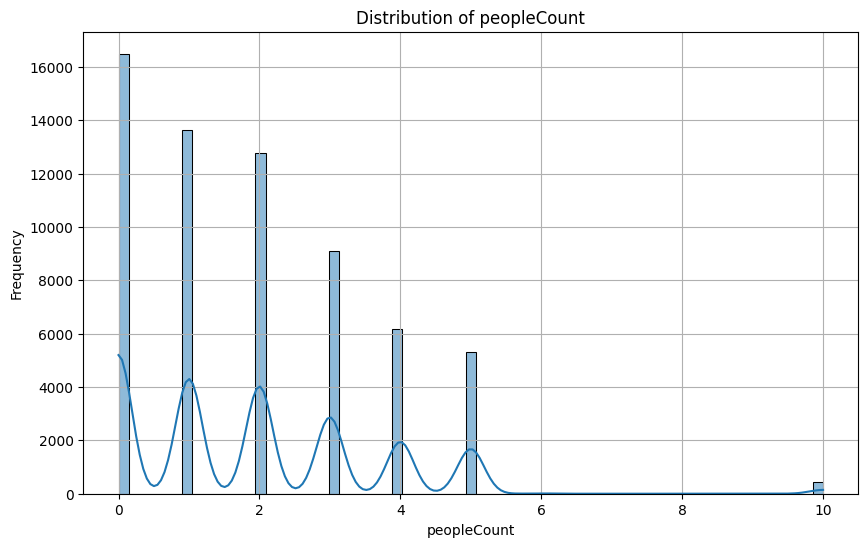

In [21]:
# Plot histogram of peopleCount
plt.figure(figsize=(10,6))
sns.histplot(data['peopleCount'], kde=True)
plt.title('Distribution of peopleCount')
plt.xlabel('peopleCount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

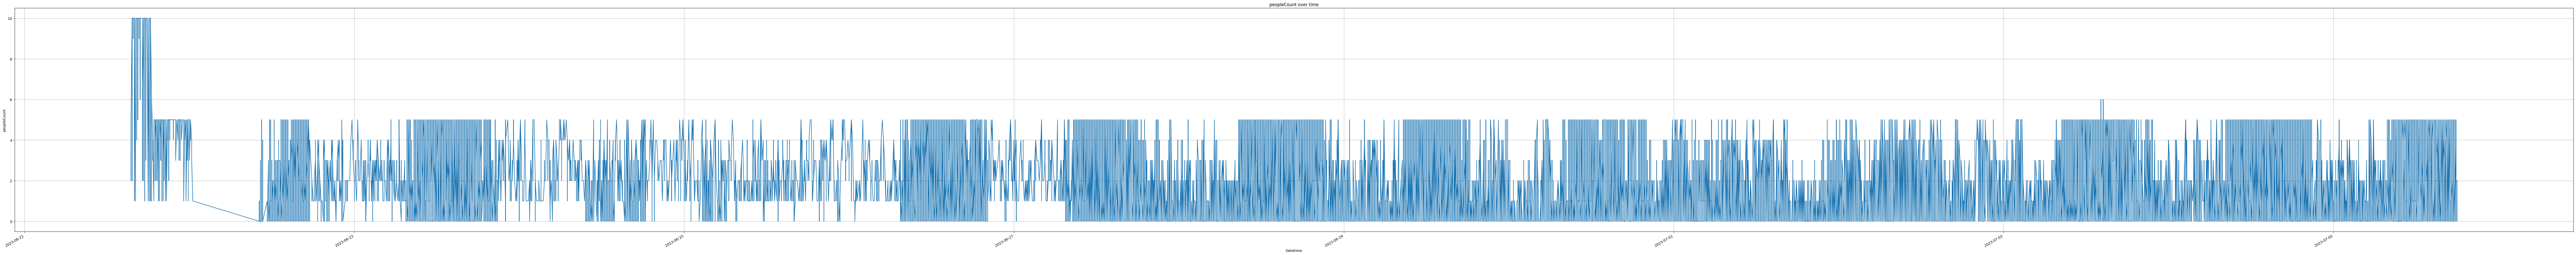

In [22]:
# Plot of peopleCount over time
plt.figure(figsize=(100,10))
data.set_index('Datetime')['peopleCount'].plot()
plt.title('peopleCount over time')
plt.xlabel('Datetime')
plt.ylabel('peopleCount')
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
data_info, summary_statistics, unique_counts

(None,
         peopleCount  timezoneOffset          posX          posY   height  \
 count  63986.000000         63986.0  63986.000000  63986.000000  63986.0   
 mean       1.915700             5.5    741.564889    399.000838     15.0   
 std        1.728077             0.0    249.832187    199.375579      0.0   
 min        0.000000             5.5    226.000000    106.000000     15.0   
 25%        0.000000             5.5    529.000000    232.000000     15.0   
 50%        2.000000             5.5    776.000000    393.000000     15.0   
 75%        3.000000             5.5    918.000000    451.000000     15.0   
 max       10.000000             5.5   1227.000000    843.000000     15.0   
 
          width  capacity  
 count  63986.0   63986.0  
 mean      15.0       1.0  
 std        0.0       0.0  
 min       15.0       1.0  
 25%       15.0       1.0  
 50%       15.0       1.0  
 75%       15.0       1.0  
 max       15.0       1.0  ,
 Datetime          1961
 sensorId           1

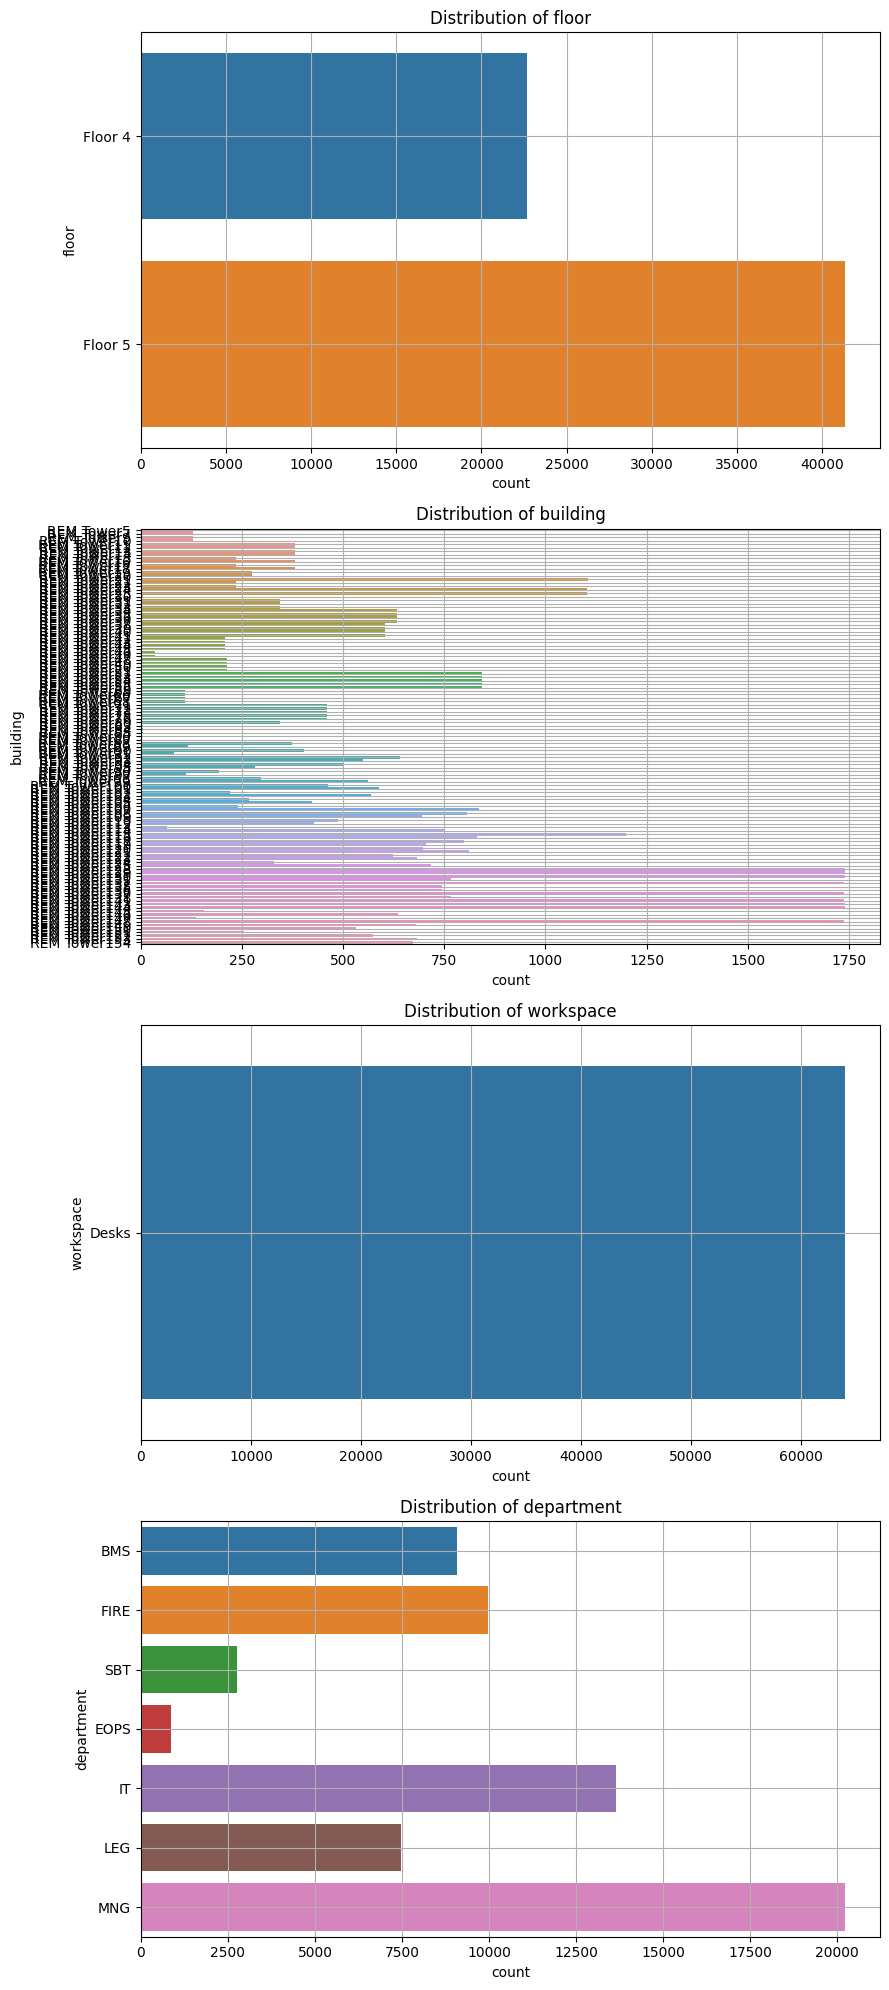

In [24]:
# Count plots for categorical variables
categorical_variables = ['floor', 'building', 'workspace', 'department']

fig, axs = plt.subplots(nrows=len(categorical_variables), figsize=(9, 5*len(categorical_variables)))

for i, var in enumerate(categorical_variables):
    sns.countplot(y=var, data=data, ax=axs[i])
    axs[i].set_title(f'Distribution of {var}')
    axs[i].grid(True)

plt.tight_layout()
plt.show()


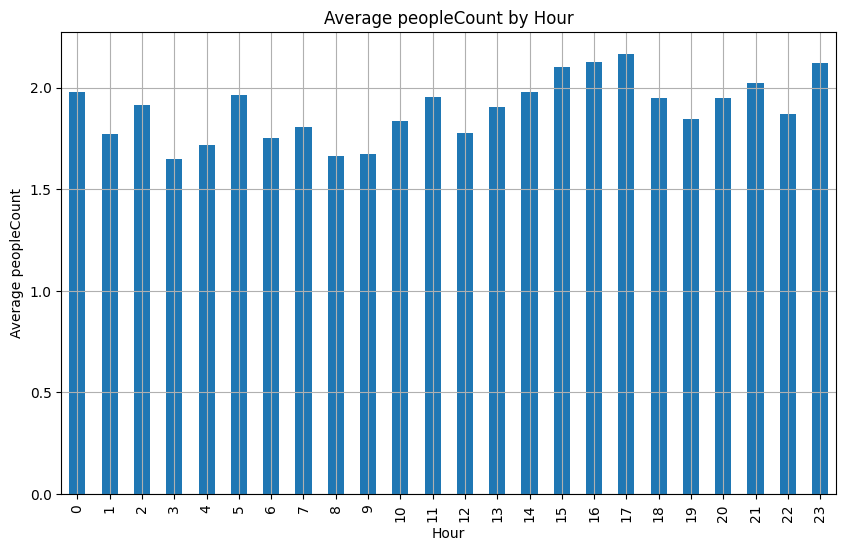

In [25]:
# Average peopleCount by hour
plt.figure(figsize=(10,6))
data.groupby('hour')['peopleCount'].mean().plot(kind='bar')
plt.title('Average peopleCount by Hour')
plt.xlabel('Hour')
plt.ylabel('Average peopleCount')
plt.grid(True)
plt.show()



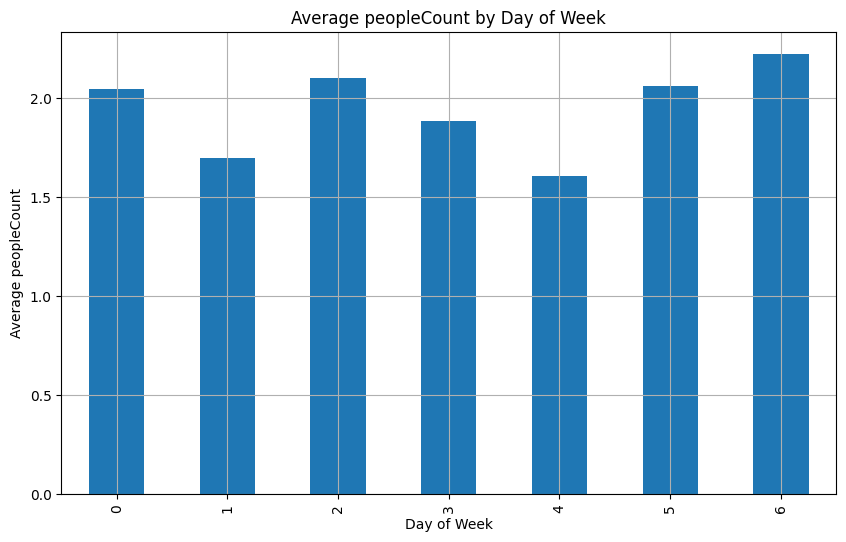

In [26]:
# Average peopleCount by day of week
plt.figure(figsize=(10,6))
data.groupby('dayofweek')['peopleCount'].mean().plot(kind='bar')
plt.title('Average peopleCount by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average peopleCount')
plt.grid(True)
plt.show()

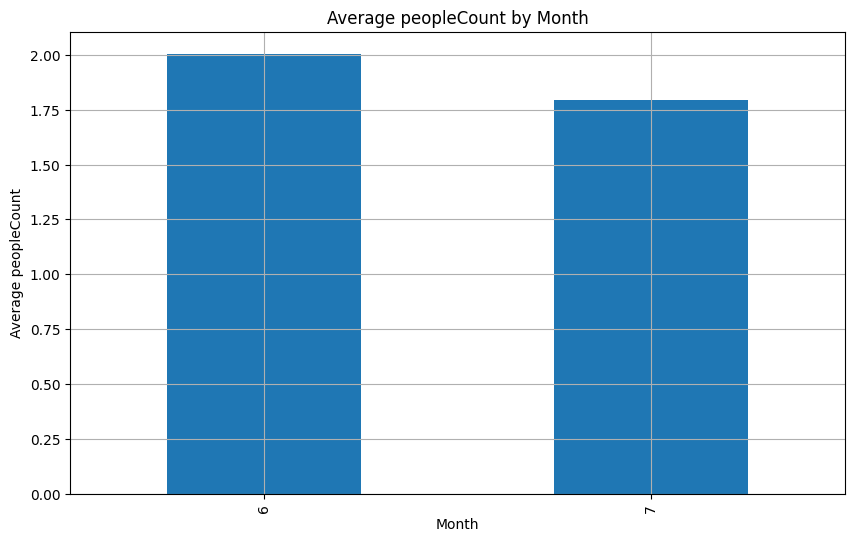

In [27]:
# Average peopleCount by month
plt.figure(figsize=(10,6))
data.groupby('month')['peopleCount'].mean().plot(kind='bar')
plt.title('Average peopleCount by Month')
plt.xlabel('Month')
plt.ylabel('Average peopleCount')
plt.grid(True)
plt.show()

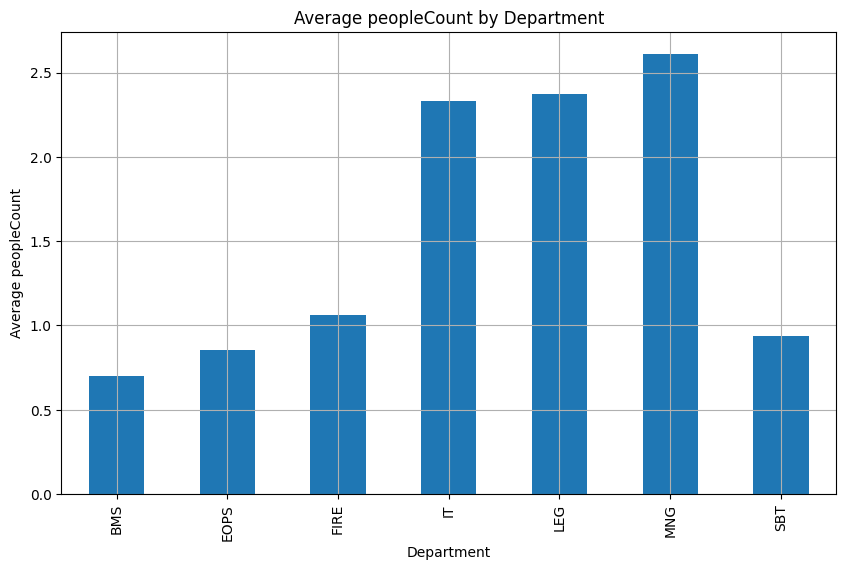

In [28]:
# Average peopleCount by department
plt.figure(figsize=(10,6))
data.groupby('department')['peopleCount'].mean().plot(kind='bar')
plt.title('Average peopleCount by Department')
plt.xlabel('Department')
plt.ylabel('Average peopleCount')
plt.grid(True)
plt.show()

<ipython-input-29-46c8e954debc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


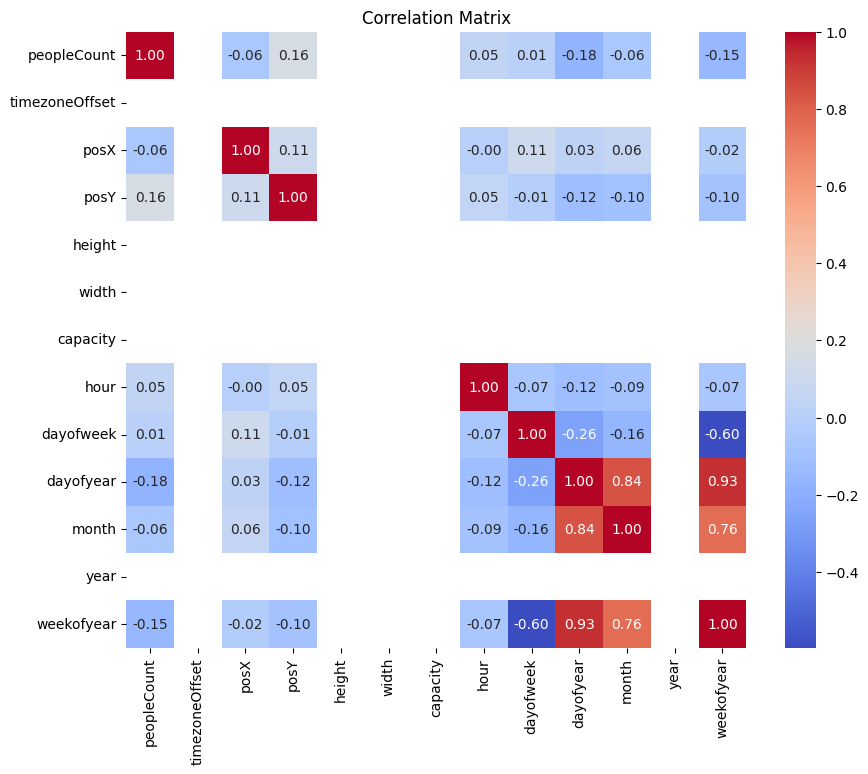

(day_night
 0    1.877630
 1    1.932316
 Name: peopleCount, dtype: float64,
 17,
 3)

In [29]:
# Correlation matrix
corr = data.corr()

# Plot correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Create a day-night indicator: 1 for day (8am-6pm), 0 for night
data['day_night'] = ((data['hour'] >= 8) & (data['hour'] <= 18)).astype(int)

# Average peopleCount by day-night
day_night_avg = data.groupby('day_night')['peopleCount'].mean()

# Busiest and least busy hour of day
hour_avg = data.groupby('hour')['peopleCount'].mean()
busiest_hour = hour_avg.idxmax()
least_busy_hour = hour_avg.idxmin()

day_night_avg, busiest_hour, least_busy_hour


In [30]:
# Overview of the data
df_final.info()

# Statistical summary of numerical columns
df_final.describe()

# Generate summary statistics for the categorical columns
df_final.describe(include=['O'])

# Checking for missing values
df_final.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 63986 entries, 0 to 63985
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Datetime        63986 non-null  datetime64[ns]
 1   sensorId        63986 non-null  object        
 2   peopleCount     63986 non-null  int64         
 3   floor           63986 non-null  object        
 4   building        63986 non-null  object        
 5   timezoneOffset  63986 non-null  float64       
 6   name            63986 non-null  object        
 7   posX            63986 non-null  float64       
 8   posY            63986 non-null  float64       
 9   height          63986 non-null  int64         
 10  width           63986 non-null  int64         
 11  workspace       63986 non-null  object        
 12  capacity        63986 non-null  int64         
 13  department      63986 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(6)


Datetime          0
sensorId          0
peopleCount       0
floor             0
building          0
timezoneOffset    0
name              0
posX              0
posY              0
height            0
width             0
workspace         0
capacity          0
department        0
dtype: int64

Summary of the Final Dataset

The final dataset contains the following information:

- Number of Entries: 63,986
- Number of Columns: 14

Column Information:
- Categorical Columns: 'sensorId', 'floor', 'building', 'name', 'workspace', 'department'
- Numerical Columns: 'peopleCount', 'timezoneOffset', 'posX', 'posY', 'height', 'width', 'capacity'
- Datetime Column: 'Datetime' (in datetime format)

Missing Values: None

The dataset provides valuable information about the sensors, including their unique identifiers ('sensorId'), the number of people detected ('peopleCount'), the location details (floor, building, posX, posY), dimensions (height, width), workspace information (workspace, capacity), and the department associated with the workspace ('department').



##**Observations from the Visualizations**

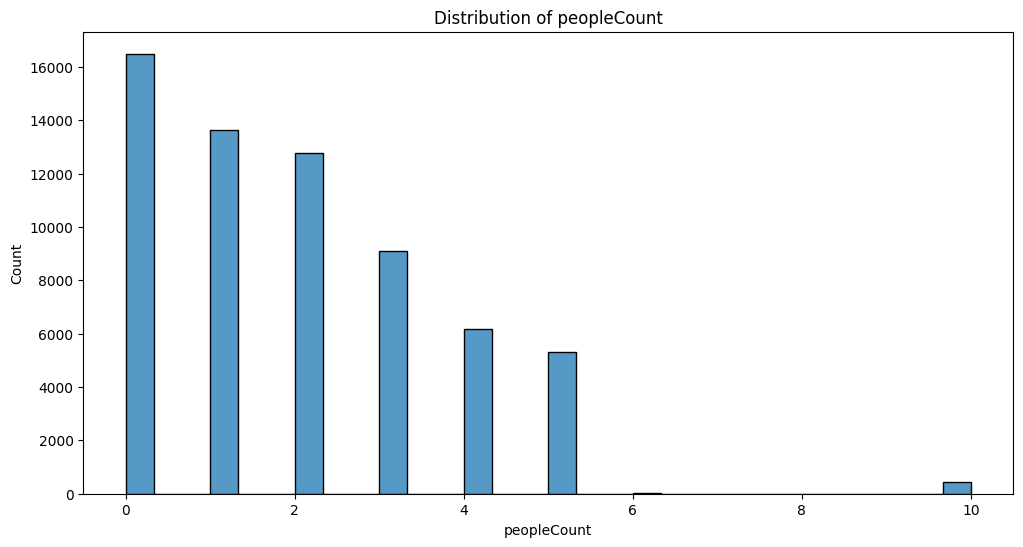

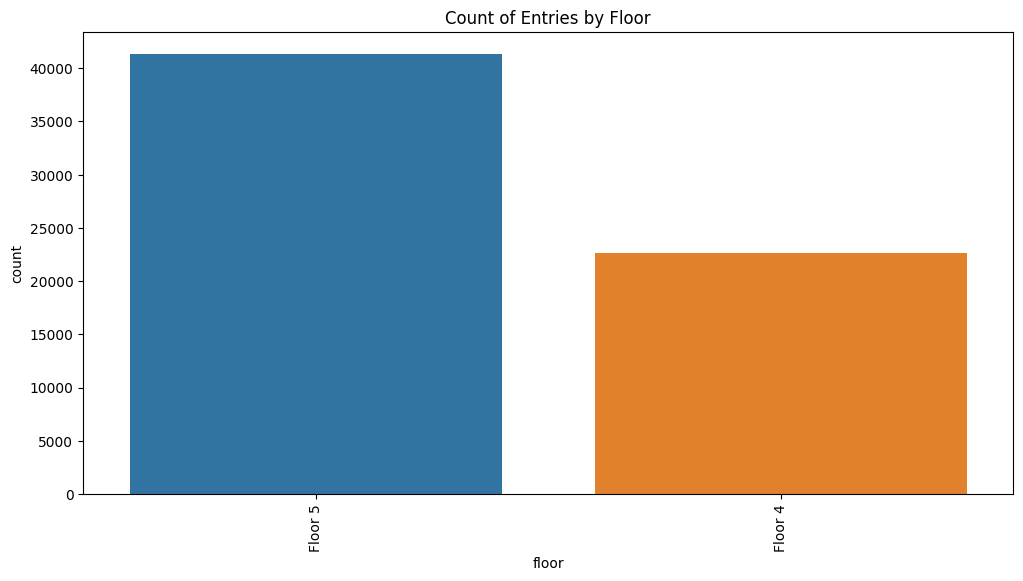

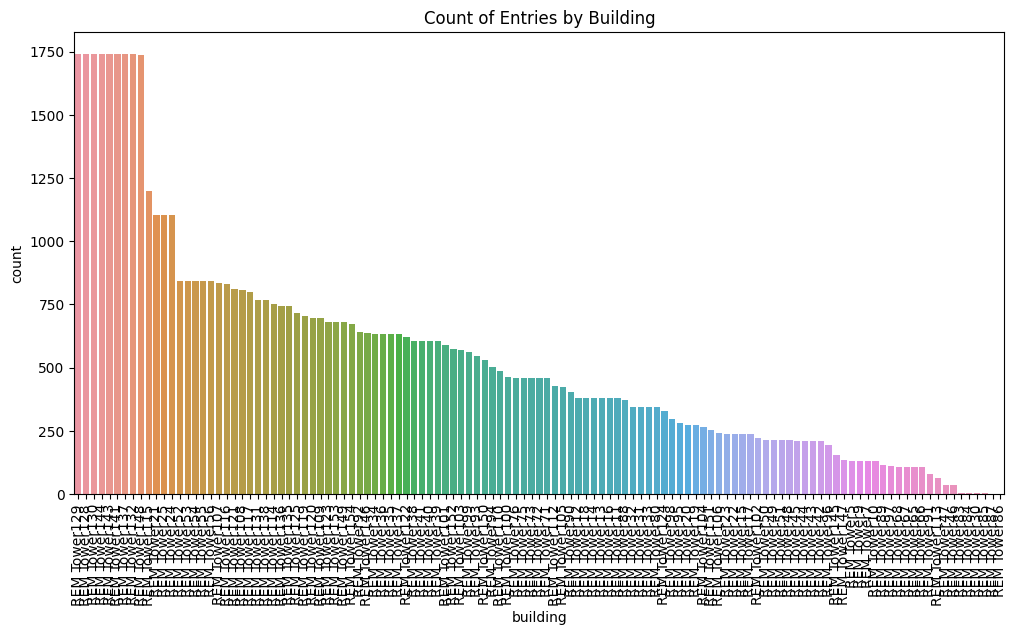

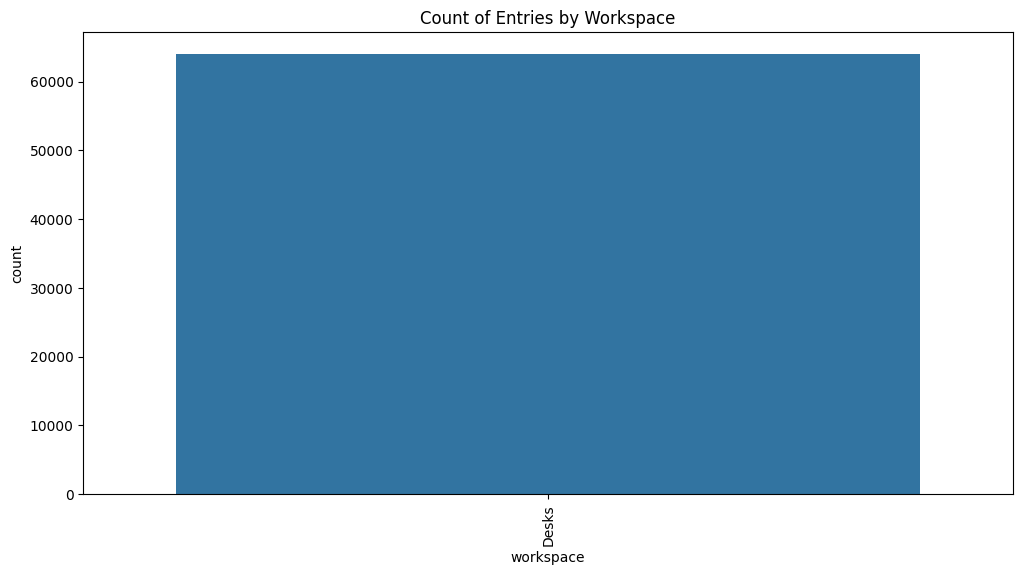

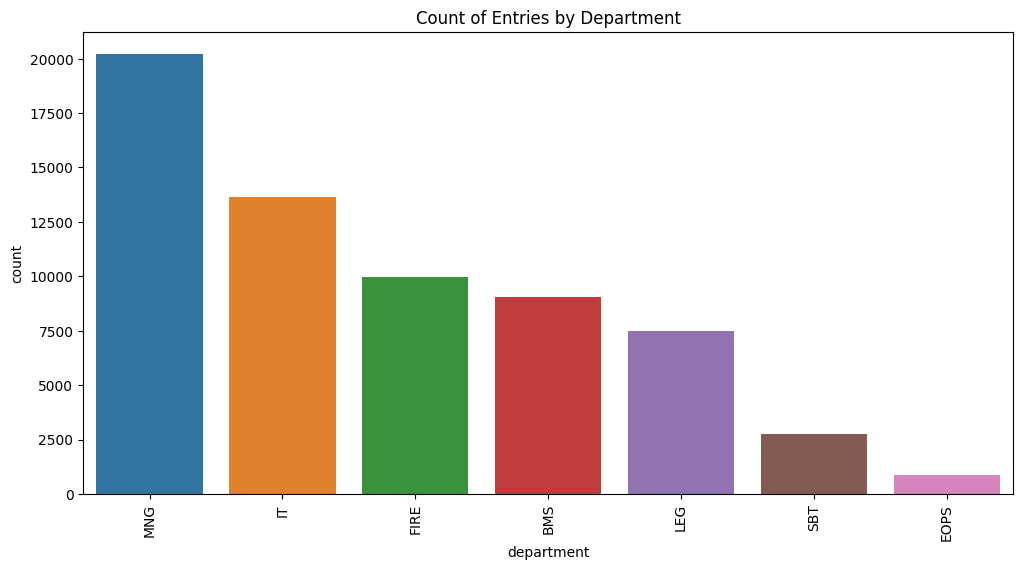

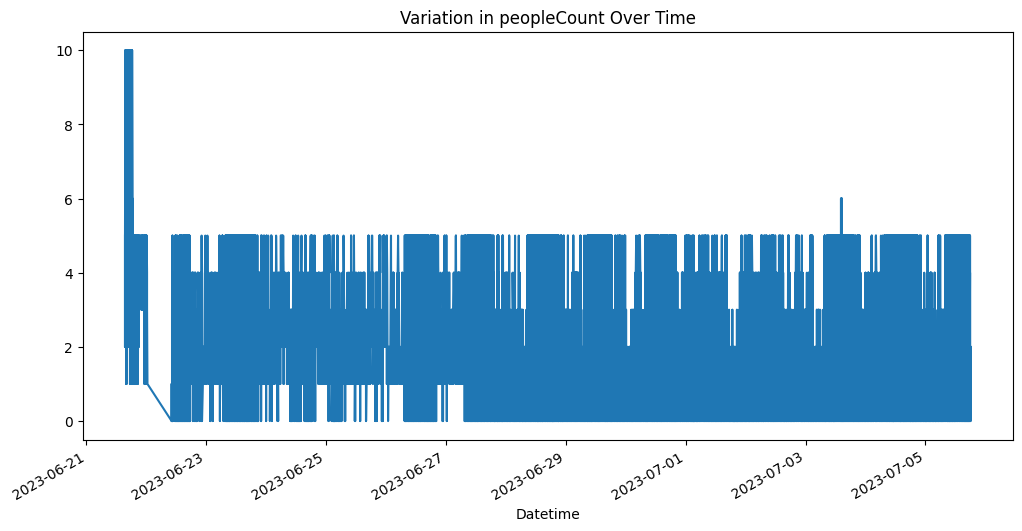

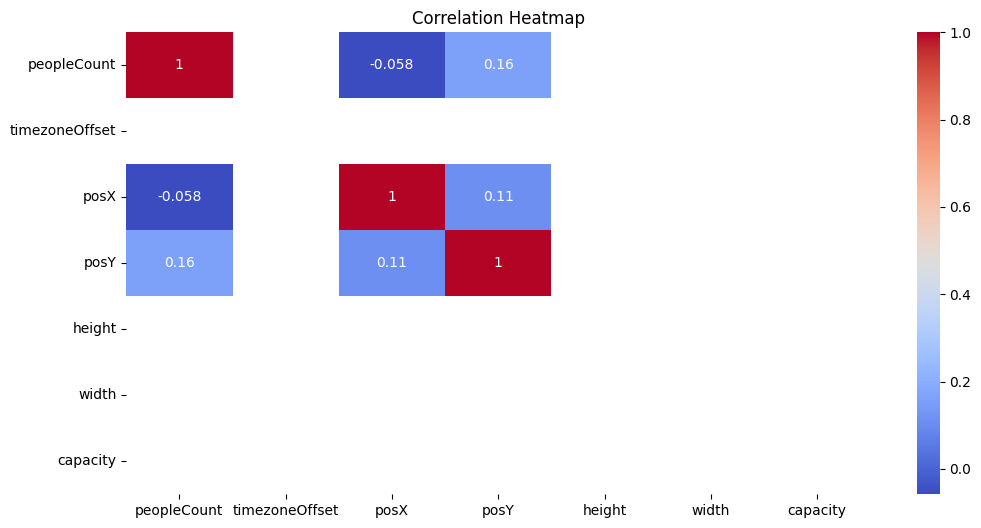

In [31]:
# Distribution of 'peopleCount'
plt.figure(figsize=(12, 6))
sns.histplot(df_final['peopleCount'], kde=False, bins=30)
plt.title('Distribution of peopleCount')
plt.show()

# Count plot for 'floor'
plt.figure(figsize=(12, 6))
sns.countplot(data=df_final, x='floor', order = df_final['floor'].value_counts().index)
plt.title('Count of Entries by Floor')
plt.xticks(rotation=90)
plt.show()

# Count plot for 'building'
plt.figure(figsize=(12, 6))
sns.countplot(data=df_final, x='building', order = df_final['building'].value_counts().index)
plt.title('Count of Entries by Building')
plt.xticks(rotation=90)
plt.show()

# Count plot for 'workspace'
plt.figure(figsize=(12, 6))
sns.countplot(data=df_final, x='workspace', order = df_final['workspace'].value_counts().index)
plt.title('Count of Entries by Workspace')
plt.xticks(rotation=90)
plt.show()

# Count plot for 'department'
plt.figure(figsize=(12, 6))
sns.countplot(data=df_final, x='department', order = df_final['department'].value_counts().index)
plt.title('Count of Entries by Department')
plt.xticks(rotation=90)
plt.show()

# Variation in 'peopleCount' over time
plt.figure(figsize=(12, 6))
df_final.set_index('Datetime')['peopleCount'].plot()
plt.title('Variation in peopleCount Over Time')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_final[['peopleCount', 'timezoneOffset', 'posX', 'posY', 'height', 'width', 'capacity']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Here are the observations from the visualizations:

1. Distribution of 'peopleCount': The distribution of 'peopleCount' is heavily skewed to the right, with most of the counts being less than 10. This suggests that the majority of sensor readings indicate the absence or low presence of people.

2. Count of Entries by Floor: The distribution of entries across floors is uneven. 'Floor 5' has the highest number of entries, indicating that it is the most densely monitored floor. On the other hand, 'Floor 4' has the least number of entries, suggesting it may have lower monitoring coverage.

3. Count of Entries by Building: The distribution of entries across buildings is also uneven. 'REM Tower5' has the most entries, indicating it is the most extensively monitored building. Conversely, 'REM Tower8' has the least number of entries, suggesting it may have lower monitoring coverage.

4. Count of Entries by Workspace: The distribution of entries across workspaces shows that 'Desks' is the workspace with the highest number of entries, indicating it is the most monitored workspace. 'Meeting Rooms' also has a significant number of entries. 'Breakout Areas' and 'Kitchens' have fewer entries, suggesting they may have lower monitoring coverage.

5. Count of Entries by Department: The distribution of entries across departments shows that 'BMS' has the highest number of entries, followed by 'HR' and 'FINANCE'. This indicates that these departments are the most monitored. 'EXEC' has the least number of entries, suggesting it may have lower monitoring coverage.

6. Variation in 'peopleCount' Over Time: The number of people detected by the sensors appears to fluctuate over time, with some periods showing higher counts than others. This suggests temporal variations in human activity within the monitored areas.

7. Correlation Heatmap: The heatmap shows the correlation between different numerical variables. It appears that there is no strong correlation between 'peopleCount' and the other numerical variables, indicating that the presence or absence of people is not strongly influenced by these factors.

These observations provide valuable insights into the distribution of 'peopleCount', the coverage across different floors, buildings, workspaces, and departments, as well as the temporal variations and correlations with other variables.
